# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
import geopy.distance
import datetime

# Read File

In [2]:
df = pd.read_csv('hcp1.csv', 
                 #dtype={'Time', 'datetime'},
                 parse_dates=['Time'])

In [3]:
#df

# Time Plots

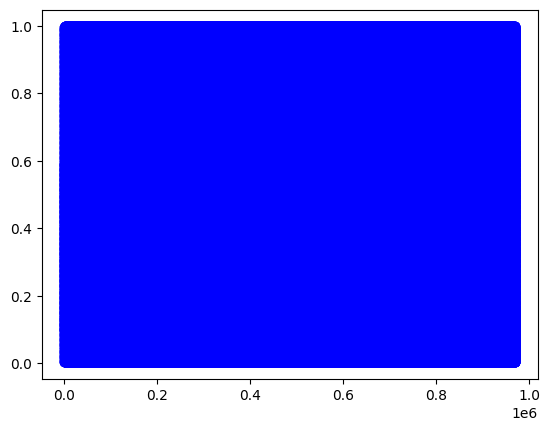

In [4]:
plt.plot(df.Time.dt.microsecond/1e6, 'bo-')

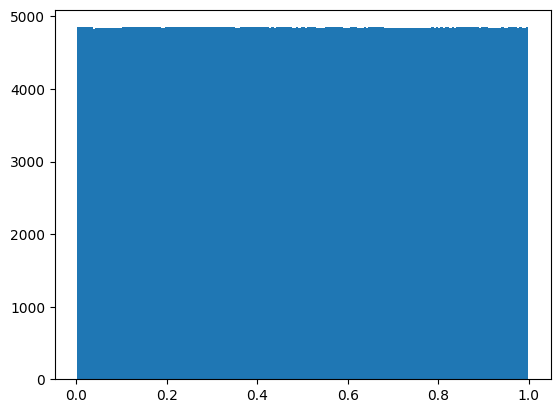

In [5]:
h = plt.hist(df.Time.dt.microsecond/1e6, bins=200)

mean: 0.005000930233493906
std : 0.0001032245858410899
min : 0.003114
max : 0.070196


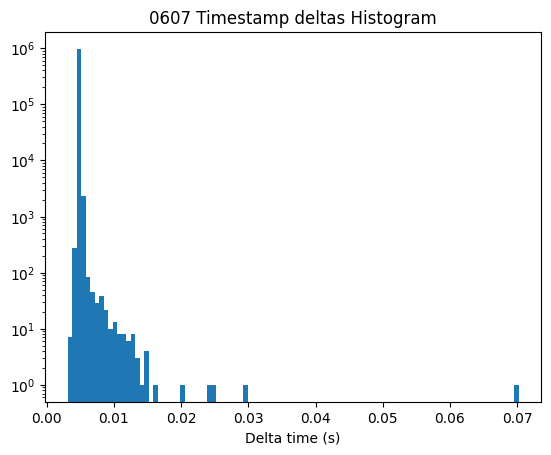

In [12]:
h = plt.hist(df.Time.diff().dt.total_seconds(),
             bins=100,
            )
plt.yscale('log')
plt.xlabel('Delta time (s)')
plt.title('0607 Timestamp deltas Histogram')
print(f'mean: {df.Time.diff().dt.total_seconds().mean()}')
print(f'std : {df.Time.diff().dt.total_seconds().std()}')
print(f'min : {df.Time.diff().dt.total_seconds().min()}')
print(f'max : {df.Time.diff().dt.total_seconds().max()}')

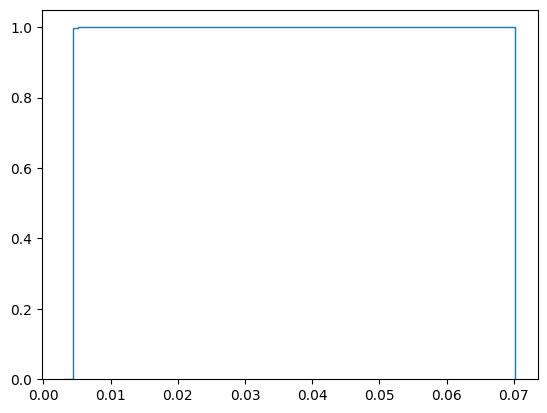

In [7]:
h = plt.hist(df.Time.diff().dt.total_seconds(),
             bins=100,
             density=True,
             histtype="step",
             cumulative=True,
            )

# Sensor Comparison Plots

Text(0.5, 0, 'Z')

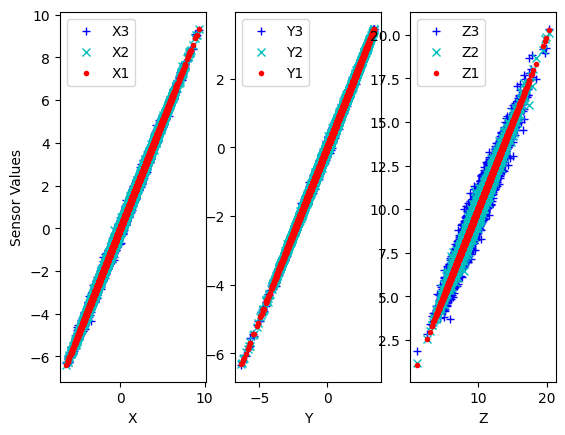

In [8]:
fig, ax = plt.subplots(1, 3)

ax[0].plot(df.x, df.x3, 'b+',
         df.x, df.x2, 'cx',
         df.x, df.x, 'r.',
        )
ax[0].legend(['X3', 'X2', 'X1'])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Sensor Values')

ax[1].plot(df.y, df.y3, 'b+',
         df.y, df.y2, 'cx',
         df.y, df.y, 'r.',
        )
ax[1].legend(['Y3', 'Y2', 'Y1'])
ax[1].set_xlabel('Y')

ax[2].plot(df.z, df.z3, 'b+',
         df.z, df.z2, 'cx',
         df.z, df.z, 'r.',
        )
ax[2].legend(['Z3', 'Z2', 'Z1'])
ax[2].set_xlabel('Z')

Text(0.5, 0, 'Rate Z')

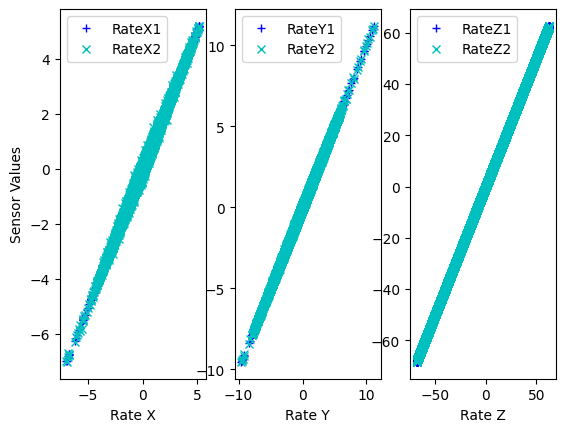

In [9]:
fig, ax = plt.subplots(1, 3)

ax[0].plot(df.ratex, df.ratex, 'b+',
         df.ratex, df.ratex2, 'cx',
        )
ax[0].legend(['RateX1', 'RateX2'])
ax[0].set_xlabel('Rate X')
ax[0].set_ylabel('Sensor Values')

ax[1].plot(df.ratey, df.ratey, 'b+',
         df.ratey, df.ratey2, 'cx',
         )
ax[1].legend(['RateY1', 'RateY2'])
ax[1].set_xlabel('Rate Y')

ax[2].plot(df.ratez, df.ratez, 'b+',
         df.ratez, df.ratez2, 'cx',
        )
ax[2].legend(['RateZ1', 'RateZ2'])
ax[2].set_xlabel('Rate Z')

# Acc Vs Time

Text(0.5, 0, 'Time')

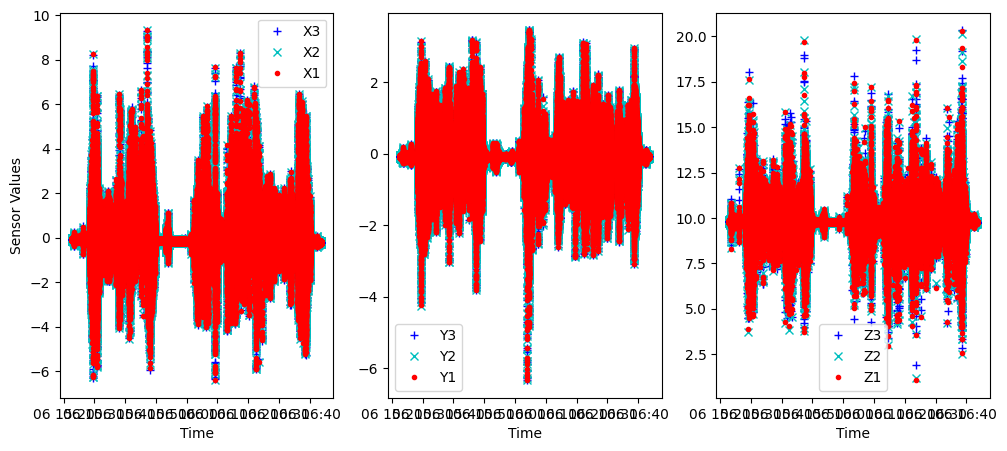

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

ax[0].plot(df.Time, df.x3, 'b+',
         df.Time, df.x2, 'cx',
         df.Time, df.x, 'r.',
        )
ax[0].legend(['X3', 'X2', 'X1'])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sensor Values')

ax[1].plot(df.Time, df.y3, 'b+',
         df.Time, df.y2, 'cx',
         df.Time, df.y, 'r.',
        )
ax[1].legend(['Y3', 'Y2', 'Y1'])
ax[1].set_xlabel('Time')

ax[2].plot(df.Time, df.z3, 'b+',
         df.Time, df.z2, 'cx',
         df.Time, df.z, 'r.',
        )
ax[2].legend(['Z3', 'Z2', 'Z1'])
ax[2].set_xlabel('Time')

In [11]:
df

Time         x         y         z     ratex  \
0      2024-06-06 15:22:48.097246 -0.083359 -0.080859  9.807187  0.014375   
1      2024-06-06 15:22:48.102075 -0.123320 -0.095156  9.843477  0.019375   
2      2024-06-06 15:22:48.107059 -0.113906 -0.103398  9.820000  0.033125   
3      2024-06-06 15:22:48.112061 -0.081328 -0.116562  9.790430  0.047500   
4      2024-06-06 15:22:48.117049 -0.044883 -0.114687  9.761445  0.061250   
...                           ...       ...       ...       ...       ...   
969229 2024-06-06 16:43:35.143697 -0.167422 -0.078164  9.742422  0.045625   
969230 2024-06-06 16:43:35.148696 -0.211562 -0.080547  9.749961  0.016250   
969231 2024-06-06 16:43:35.153938 -0.259023 -0.103477  9.807148  0.008750   
969232 2024-06-06 16:43:35.158862 -0.246797 -0.106836  9.804258  0.033125   
969233 2024-06-06 16:43:35.163859 -0.221914 -0.103906  9.797266  0.044375   

           ratey     ratez  temperature        x2        y2        z2  \
0       0.027500  0.003125        30.63 -0.080469 -0.080469  9.802344   
1       0.010000 -0.011875        30.64 -0.118750 -0.091563  9.839688   
2      -0.010000 -0.020625        30.63 -0.116719 -0.101250  9.827500   
3      -0.009375 -0.007500        30.63 -0.086094 -0.115781  9.793125   
4      -0.008125  0.010625        30.64 -0.046406 -0.115469  9.764375   
...          ...       ...          ...       ...       ...       ...   
969229  0.021875  0.012500        34.33 -0.165625 -0.079687  9.744063   
969230  0.024375  0.014375        34.32 -0.211875 -0.080156  9.747813   
969231  0.023750  0.016875        34.33 -0.259375 -0.103438  9.805781   
969232  0.003750  0.020625        34.33 -0.251406 -0.106563  9.803281   
969233 -0.006875  0.017500        34.33 -0.224688 -0.104688  9.796563   

          ratex2    ratey2    ratez2        x3        y3        z3  
0       0.014687  0.027813  0.003750 -0.091875 -0.082500  9.815000  
1       0.017812  0.014687 -0.007500 -0.124375 -0.096875  9.843125  
2       0.031875 -0.009062 -0.021250 -0.111875 -0.106250  9.814375  
3       0.046250 -0.009375 -0.009375 -0.076250 -0.117500  9.787500  
4       0.058438 -0.008438  0.010000 -0.042500 -0.113125  9.756250  
...          ...       ...       ...       ...       ...       ...  
969229  0.044687  0.021875  0.012500 -0.178125 -0.075625  9.738750  
969230  0.020938  0.024688  0.014687 -0.226250 -0.088125  9.762500  
969231  0.008125  0.025625  0.016875 -0.261250 -0.105625  9.811875  
969232  0.031250  0.005313  0.019688 -0.240625 -0.107500  9.798750  
969233  0.044375 -0.006250  0.017500 -0.216875 -0.103125  9.798750  

[969234 rows x 17 columns]